In [1]:
import os
import numpy as np
import torch
import matplotlib.pyplot as plt

import test
from utils.data_utils import get_loader
from models_swin.ms_swin_transformer import *
from models_swin.swin_transformer import SwinTransformer
import models_swin.ms_backup as ms_b

import matplotlib.pyplot as plt
from visual import featuremap

In [25]:
os.environ["CUDA_VISIBLE_DEVICES"]="0"

args=test.parse_option()

In [3]:
# data
_, test_loader = get_loader(args)
# train_list = list(enumerate(train_loader))
test_list = list(enumerate(test_loader))

# for i in range(0,3):
img, label = next(iter(test_loader))

plt.imshow(img[0,:].permute(1,2,0).detach().cpu().numpy())
# plt.imshow(test_loader.dataset.test_img[0])

In [77]:
# model
model_ckpt = torch.load('output/sample_run_swin_t_no_checkpoint.bin')
# model_ckpt = torch.load('output/ms_sample_run_swin_t_no_check_checkpoint.bin')
# model=MSSwinTransformer(img_size=448, num_classes=200, num_feature_layers=1, detail_features=True)
model=SwinTransformer(img_size=448, num_classes=200)
# model=ms_b.MSSwinTransformer(img_size=448, num_classes=200)
model.load_state_dict(model_ckpt['model'], strict=False)
model.eval()
# x=torch.randn((16,3,448,448))
x = test_list[0][1][0]
f=model.forward_features(x)
logits=model(x)
# f.shape

In [ ]:
layers = [2, 2, 6, 2]
lf = model.layer_features
for i in range(len(layers)):
    for j in range(layers[i]):
        stage = i
        block = j
        edge=6
        corr,f = featuremap(lf[stage][block], num_batch=0, edge=edge, start_ch=0)

        plt.figure()
        plt.suptitle('stage={0},block={1}'.format(stage, block), fontsize=14)
        plt.subplot(1, 2, 1)
        plt.imshow(corr)    
        plt.title("channel correlation")
        plt.subplot(1, 2, 2)
        plt.imshow(f)
        plt.title("feature map")
        # plt.colorbar()
        plt.savefig('./visual/stage={0}_block={1}_edge{2}.png'.format(stage,block,edge),dpi=300)
        plt.show()                                    

In [ ]:
edge=6
corr,feat = featuremap(f[0].detach().cpu().numpy(), num_batch=0, edge=edge, start_ch=0)

plt.subplot(1, 2, 1)
plt.imshow(corr)
plt.subplot(1, 2, 2)
plt.imshow(feat)

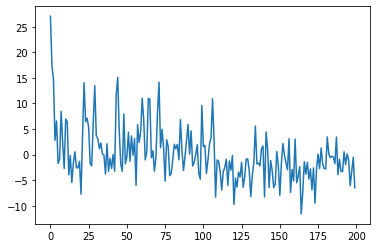

In [100]:

# s=torch.nn.Sigmoid()(logits)
# sd=s.detach()
# plt.plot(sd[1,:])
plt.plot(logits[7,:].detach())

In [51]:
img, label = next(iter(test_loader))

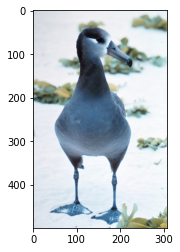

In [125]:
# plt.imshow(img[5].permute(1,2,0))
plt.imshow(test_loader.dataset.test_img[5])

In [135]:
args.model_type

'ViT-B_16'

In [132]:
test_loader.sampler